In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("C://Pallav//Python-Data-Science-and-Machine-Learning-Bootcamp//Python-Data-Science-and-Machine-Learning-Bootcamp//Machine_Learning_Sections/Logistic-Regression/titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


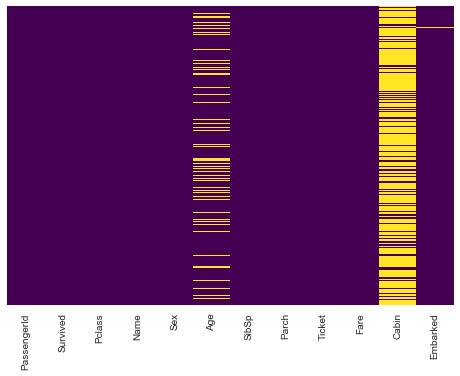

In [4]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
sns.set_style('whitegrid')

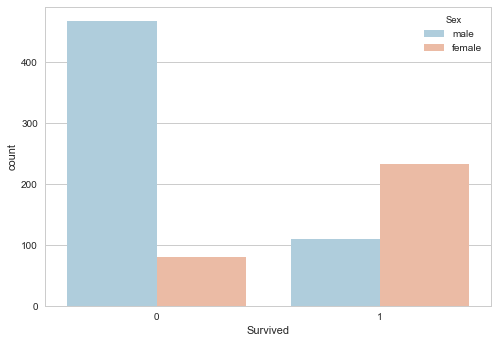

In [6]:
sns.countplot(x= 'Survived' , data = train , hue='Sex' , palette='RdBu_r')

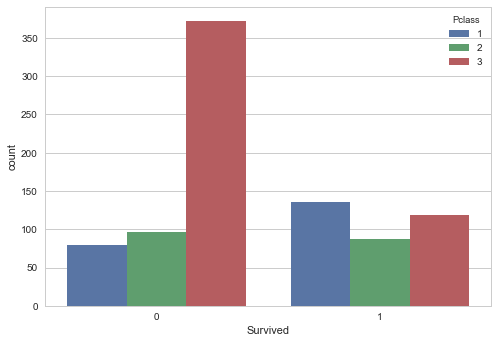

In [7]:
sns.countplot(x= 'Survived' , data = train , hue='Pclass' )

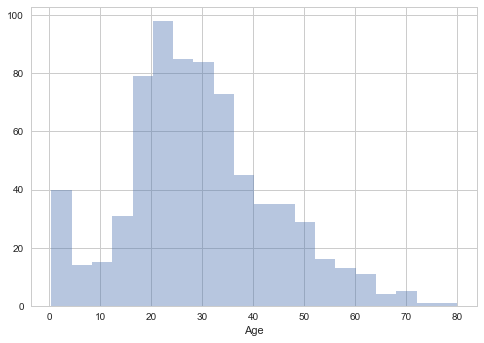

In [8]:
sns.distplot(train['Age'].dropna() , kde = False , )

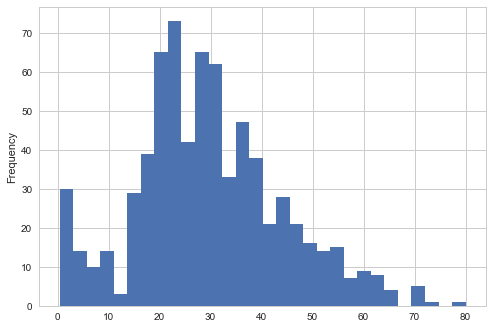

In [9]:
train['Age'].plot.hist(bins = 30)

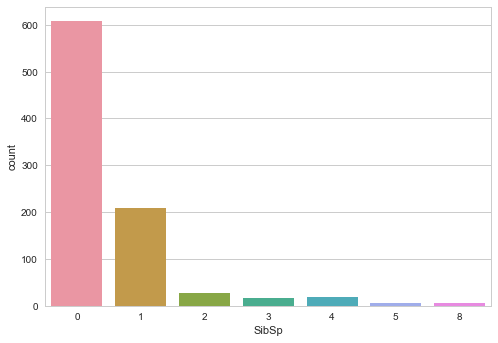

In [10]:
sns.countplot(x = 'SibSp', data = train)

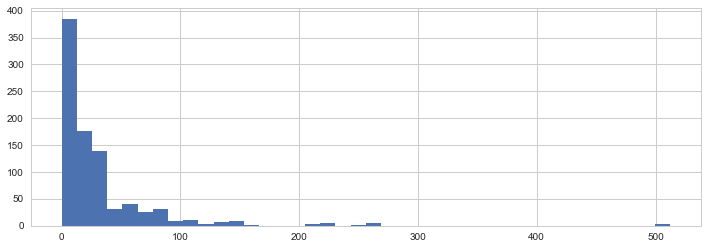

In [11]:
train['Fare'].hist(bins = 40 , figsize = (12,4))

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
train['Fare'].iplot(kind = 'hist')

In [19]:
plt.figure(figsize=(18,4))

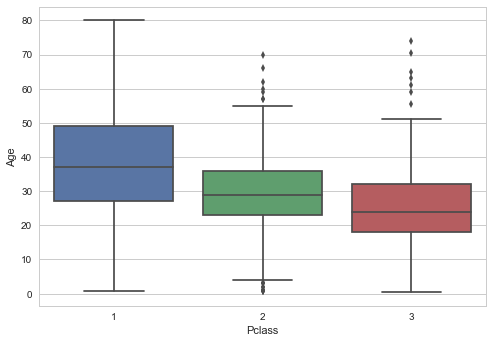

In [20]:
sns.boxplot(x = 'Pclass' , y='Age', data = train)

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
        

In [22]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

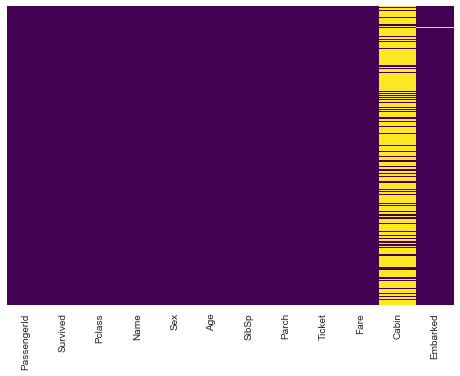

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
train.drop('Cabin', inplace = True, axis = 1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


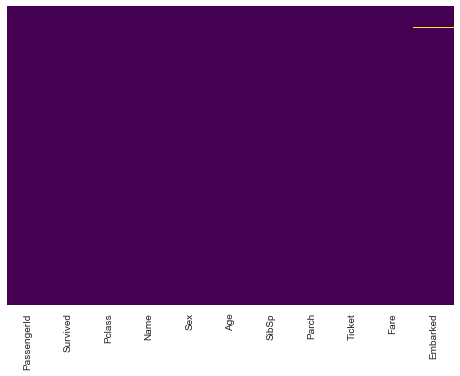

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
train.dropna(inplace=True)

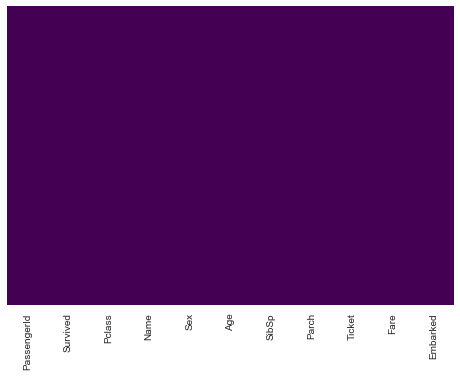

In [28]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
# Here cleanup data is complete.

In [31]:
# Convert male and female to 1 and 0

sex = pd.get_dummies(train['Sex'], drop_first=True)


In [33]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
# Convert embark to S and C columns
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [34]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [35]:
train = pd.concat([train,sex,embark], axis=1 )

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(['Sex' , 'Embarked' ,  'Ticket'] , axis = 1 , inplace = True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1


In [43]:
train.drop(['Name'] , axis = 1 , inplace = True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [48]:
train.drop('PassengerId' , axis = 1, inplace=True)

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
# Apply algorithm

X = train.drop('Survived' , axis=1)

y = train['Survived']

In [72]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [73]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:
from sklearn.cross_validation import train_test_split

In [75]:
X_train , X_test ,y_train , y_test = train_test_split(X , y, test_size = 0.3, random_state = 101)

In [76]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [77]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1
2,3,26.0,0,0,7.925,0,0,1
690,1,31.0,1,0,57.000,1,0,1
196,3,24.0,0,0,7.750,1,1,0


In [78]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.05,1,0,1
613,3,24.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,24.0,0,0,15.50,1,1,0


In [80]:
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logmodel = LogisticRegression()

In [83]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
prediction = logmodel.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
print(confusion_matrix(y_test, prediction))

[[148  15]
 [ 36  68]]


# Logistic Regression Project 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
ad_data = pd.read_csv("C://Pallav//Python-Data-Science-and-Machine-Learning-Bootcamp//Python-Data-Science-and-Machine-Learning-Bootcamp//Machine_Learning_Sections/Logistic-Regression/advertising.csv")

In [91]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [92]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [93]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


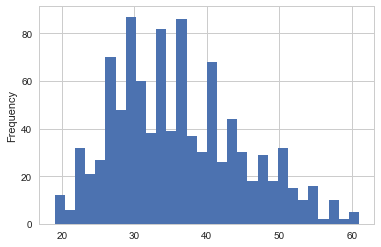

In [106]:
ad_data['Age'].plot.hist(bins = 30)


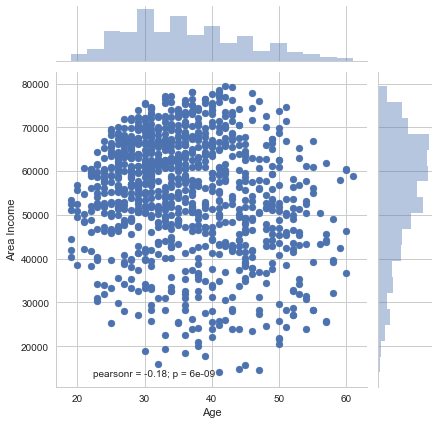

In [109]:
sns.jointplot(x='Age' , y = 'Area Income' , data = ad_data)


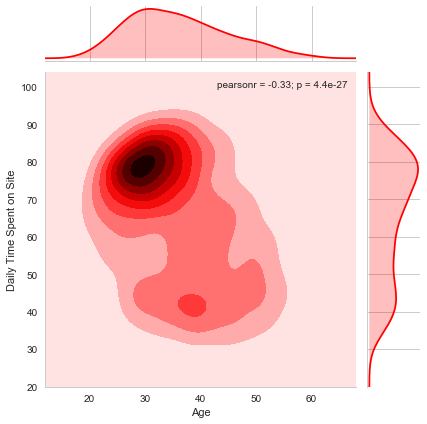

In [112]:
sns.jointplot(x='Age' , y = 'Daily Time Spent on Site' , data = ad_data, kind = 'kde', color ='red' )

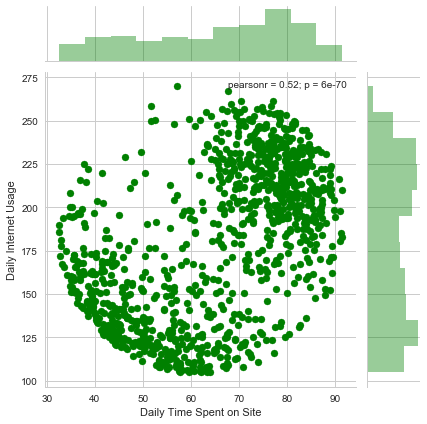

In [114]:
sns.jointplot(x= 'Daily Time Spent on Site' , y= 'Daily Internet Usage', data = ad_data, color = 'green')

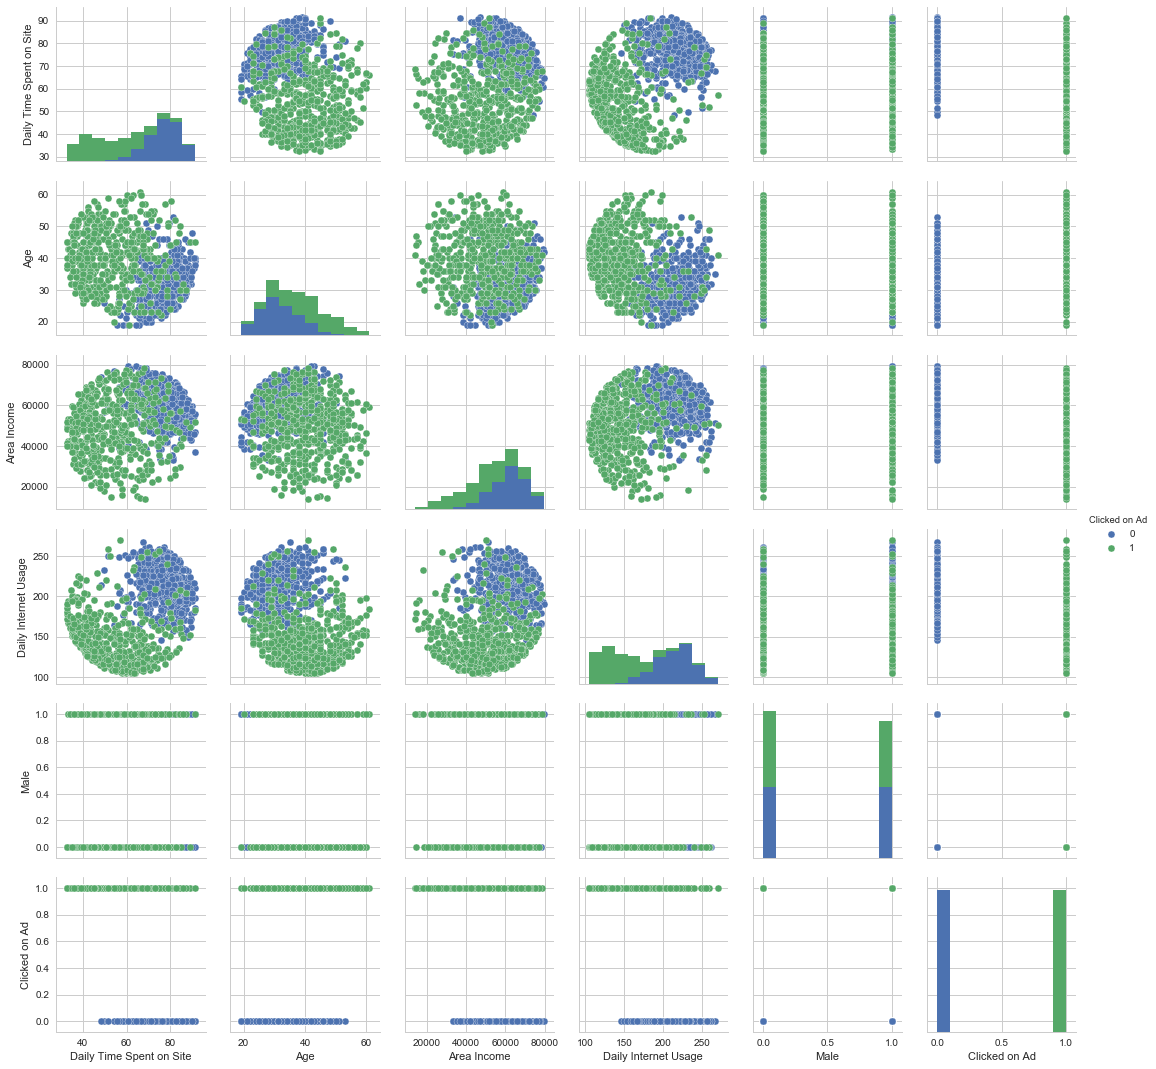

In [119]:
sns.pairplot(data = ad_data, hue = 'Clicked on Ad')

In [120]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


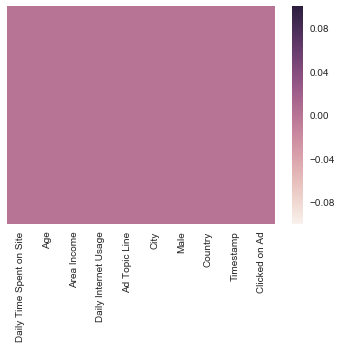

In [129]:
sns.heatmap(ad_data.isnull() , yticklabels=False)

In [148]:
#Split the data into training set and testing set using train_test_split

X = ad_data.drop(['Clicked on Ad','Timestamp','City','Country','Ad Topic Line' ] , axis=1)
y = ad_data['Clicked on Ad']

In [149]:
from sklearn.cross_validation import train_test_split

In [150]:
X_train , X_test ,y_train , y_test = train_test_split(X , y, test_size = 0.3, random_state = 101)

In [145]:
from sklearn.linear_model import LogisticRegression

In [151]:
logmodelproject = LogisticRegression()

In [152]:
logmodelproject.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [153]:
prediction = logmodelproject.predict(X_test)

In [154]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



In [155]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[149   8]
 [ 15 128]]
